# Programming Assignment - 7
---
## Name: Samruth Vennapusala
---

In [7]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

## Question 1
---
Follow the example on Eigenfaces to find the eigenface representation of facial images from other sources. You should display some original images and compare them with their reconstructions upon PCA.

Here are some other facial image repositories.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

# I chose to use the Yale data set

In [8]:
# Your code starts  here
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

Dimensions: (585, 480, 640)


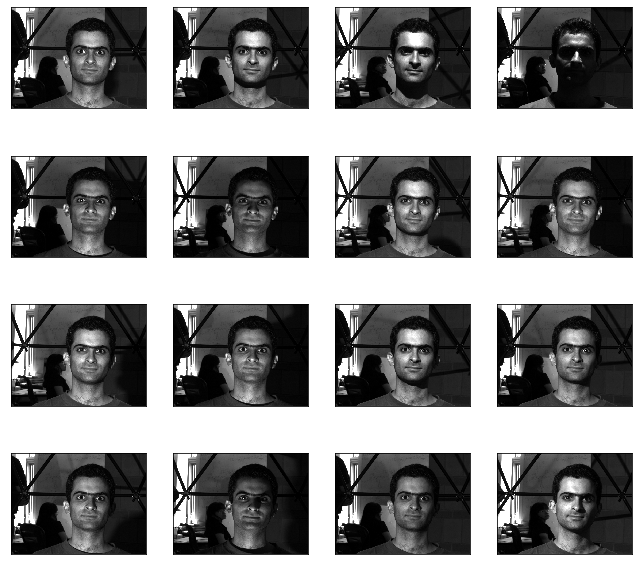

In [10]:
dir=r"C:\Users\samru\Desktop\yaleB11\yaleB11"
#dir='YALE/centered'
celebrity_photos=os.listdir(dir)[0000:1000]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
n_samples, h, w = images.shape
print("Dimensions:",images.shape)
plot_portraits(images, h, w, n_row=4, n_col=4)

In [11]:
def eigenfaces(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    pca_obj = PCA(n_components=n_pc)
    projected  = pca_obj.fit_transform(centered_data)
    #U, S, V = np.linalg.svd(centered_data)
    components = pca_obj.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

In [12]:
n_components = 200
X = images.reshape(n_samples, h*w)
P, C, M, Y= eigenfaces(X, n_components)

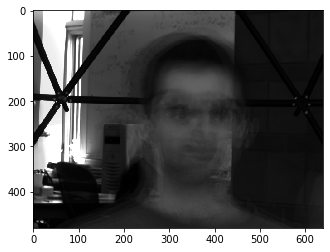

In [13]:
# The mean-face
plt.imshow(M.reshape((h, w)), cmap=plt.cm.gray)
plt.show()

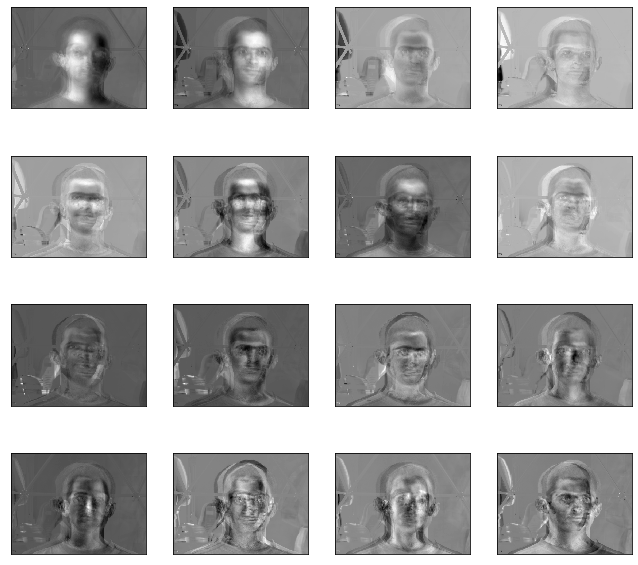

In [16]:
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, h, w, 4, 4) 

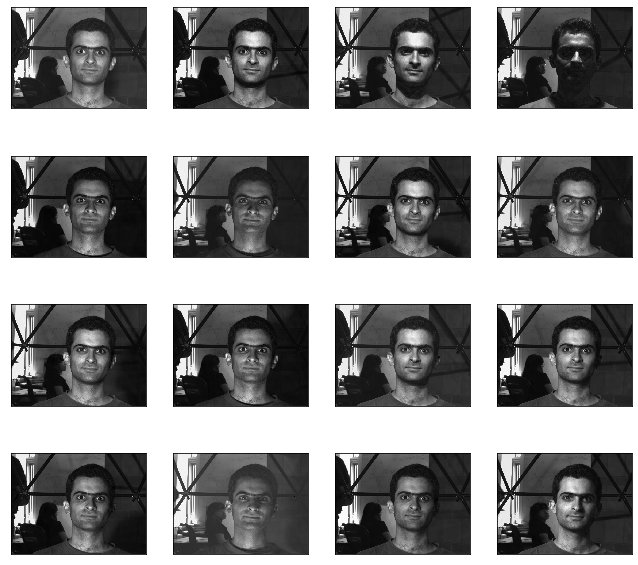

In [19]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, h, w, n_row=4, n_col=4)